### TIME SERIES ANALYSIS AND FORECASTING WITH ARIMA

load the data

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

In [4]:
df=pd.read_csv('/content/TimeSeries_TotalSolarGen_and_Load_IT_2016.csv')

In [5]:
df.head()

,utc_timestamp,IT_load_new,IT_solar_generation
0,2016-01-01T00:00:00Z,21665.0,1
1,2016-01-01T01:00:00Z,20260.0,0
2,2016-01-01T02:00:00Z,19056.0,0
3,2016-01-01T03:00:00Z,18407.0,0
4,2016-01-01T04:00:00Z,18425.0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   utc_timestamp        8784 non-null   object 
 1   IT_load_new          8712 non-null   float64
 2   IT_solar_generation  8784 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 206.0+ KB


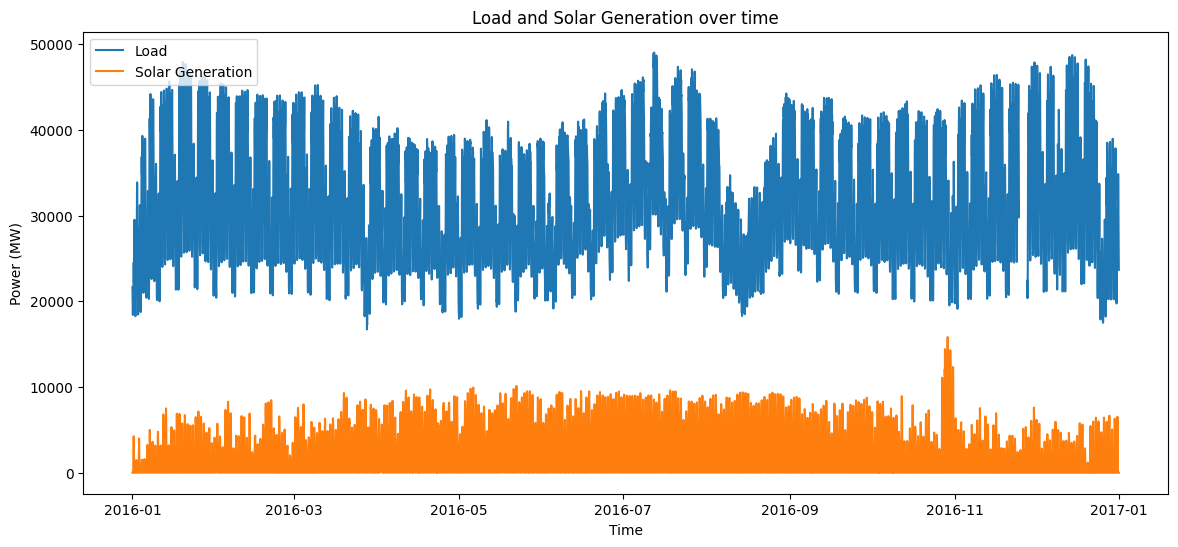

In [7]:
df['utc_timestamp']=pd.to_datetime(df['utc_timestamp'])
plt.figure(figsize=(14,6))
plt.plot(df['utc_timestamp'],df['IT_load_new'],label='Load')
plt.plot(df['utc_timestamp'],df['IT_solar_generation'],label='Solar Generation')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Power (MW)')
plt.title('Load and Solar Generation over time')
plt.show()

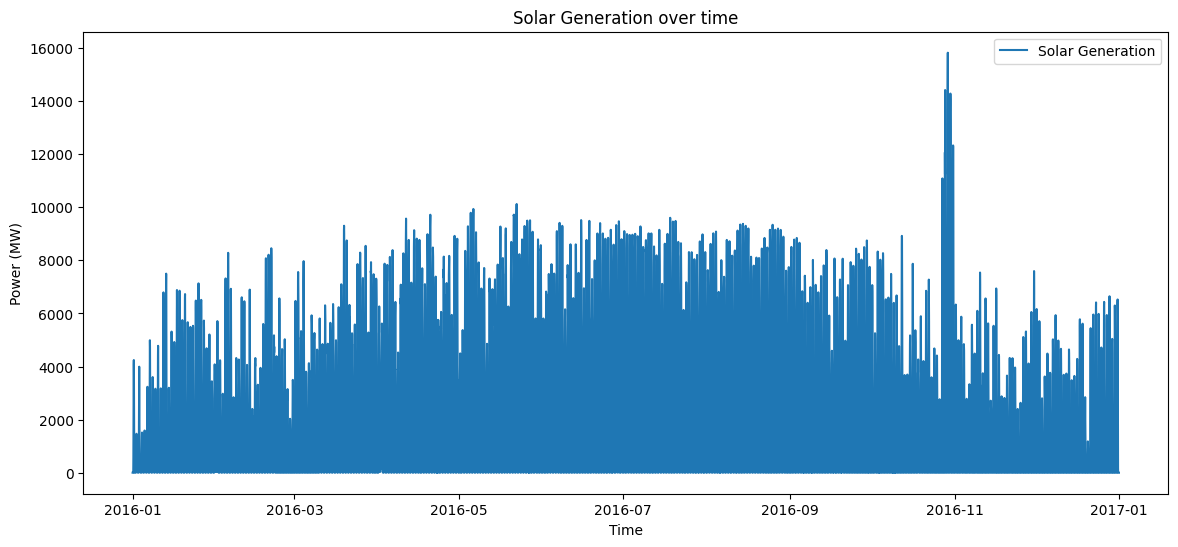

In [10]:
df['utc_timestamp']=pd.to_datetime(df['utc_timestamp'])
plt.figure(figsize=(14,6))
#plt.plot(df['utc_timestamp'],df['IT_load_new'],label='Load')
plt.plot(df['utc_timestamp'],df['IT_solar_generation'],label='Solar Generation')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Power (MW)')
plt.title('Solar Generation over time')
plt.show()

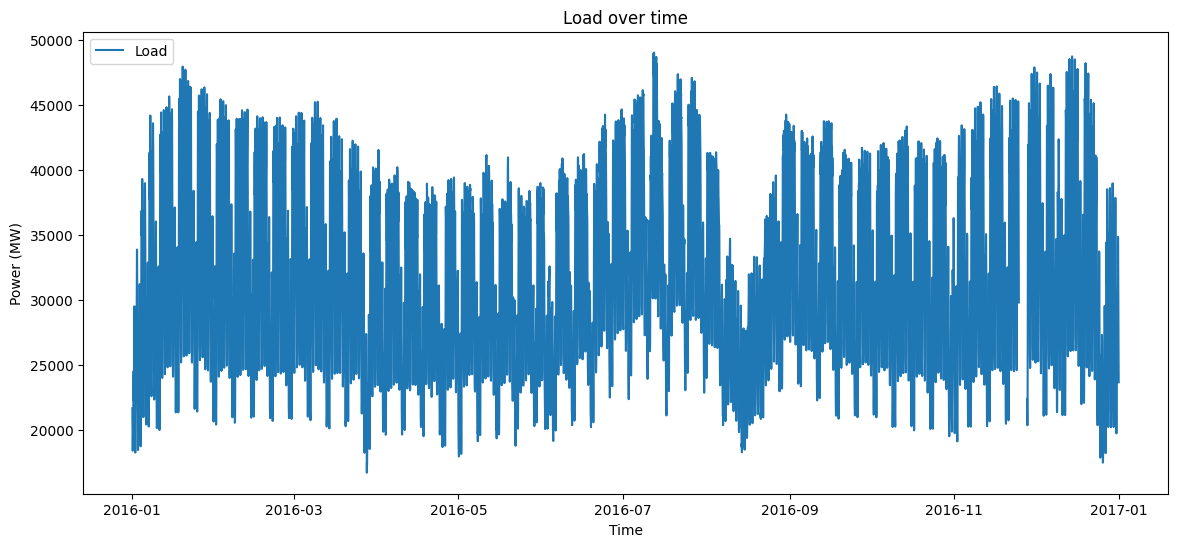

In [11]:
df['utc_timestamp']=pd.to_datetime(df['utc_timestamp'])
plt.figure(figsize=(14,6))
plt.plot(df['utc_timestamp'],df['IT_load_new'],label='Load')
#plt.plot(df['utc_timestamp'],df['IT_solar_generation'],label='Solar Generation')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Power (MW)')
plt.title('Load over time')
plt.show()

In [12]:
df.isnull().sum()

,0
utc_timestamp,0
IT_load_new,72
IT_solar_generation,0


# Stationarity test

In [16]:
def adf_test(timeseries):
  print("Results of Dickey-Fuller Test:")
  dftest=adfuller(timeseries,autolag='AIC')
  dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
  for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key]=value
  print(dfoutput)

In [17]:
df['IT_load_new'].fillna(method='ffill',inplace=True)
print("Missing values after filling:")
print(df.isnull().sum())
print("\nADF for 'IT_load_new' after filling missing values:")
adf_test(df['IT_load_new'])
adf_test(df['IT_solar_generation'])

/tmp/ipython-input-1309604217.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['IT_load_new'].fillna(method='ffill',inplace=True)
/tmp/ipython-input-1309604217.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['IT_load_new'].fillna(method='ffill',inplace=True)


Missing values after filling:
utc_timestamp          0
IT_load_new            0
IT_solar_generation    0
dtype: int64

ADF for 'IT_load_new' after filling missing values:
Results of Dickey-Fuller Test:
Test Statistic                -1.197390e+01
p-value                        3.841445e-22
#Lags Used                     3.700000e+01
Number of Observations Used    8.746000e+03
Critical Value (1%)           -3.431098e+00
Critical Value (5%)           -2.861871e+00
Critical Value (10%)          -2.566946e+00
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -5.741335e+00
p-value                        6.265438e-07
#Lags Used                     3.600000e+01
Number of Observations Used    8.747000e+03
Critical Value (1%)           -3.431098e+00
Critical Value (5%)           -2.861870e+00
Critical Value (10%)          -2.566946e+00
dtype: float64


Build ARIMA model for IT_load_new

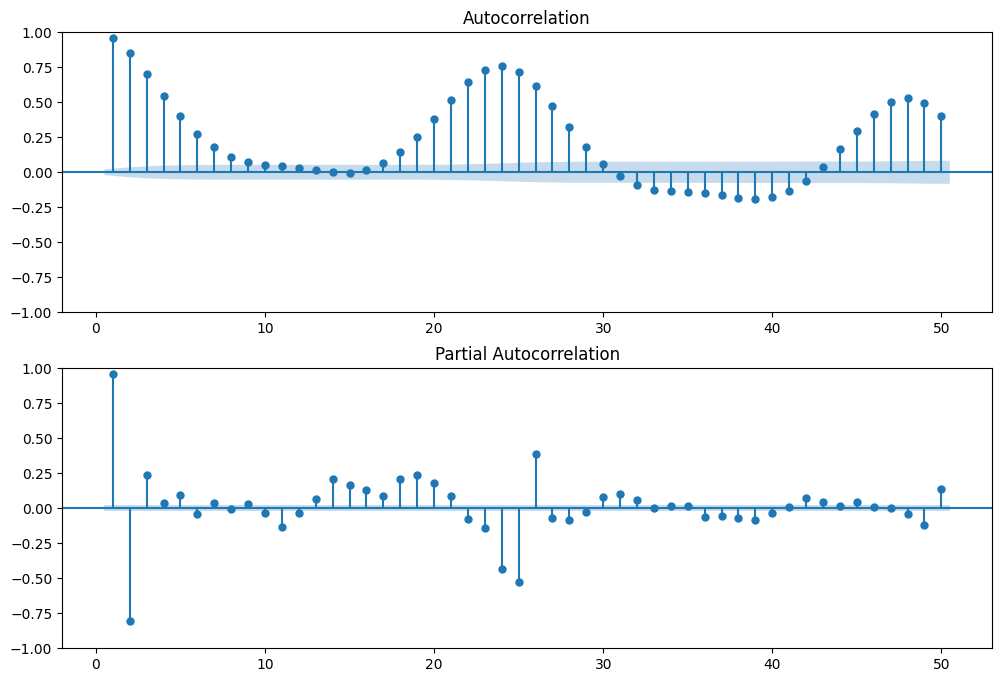

In [19]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

fig,(ax1,ax2)=plt.subplots(2,1,figsize=(12,8))
plot_acf(df['IT_load_new'],lags=50,zero=False,ax=ax1)
plot_pacf(df['IT_load_new'],lags=50,zero=False,ax=ax2)
plt.show()

In [20]:
from math import sqrt

train_size=int(len(df['IT_load_new'])*0.8)
train,test=df['IT_load_new'][:train_size],df['IT_load_new'][train_size:]
model=ARIMA(train,order=(2,0,2))
model_fit=model.fit()
predictions=model_fit.predict(start=len(train),end=len(train)+len(test)-1,typ='levels')

rmse=sqrt(mean_squared_error(test,predictions))
print('Test RMSE: %.3f'%rmse)


Test RMSE: 7714.952


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


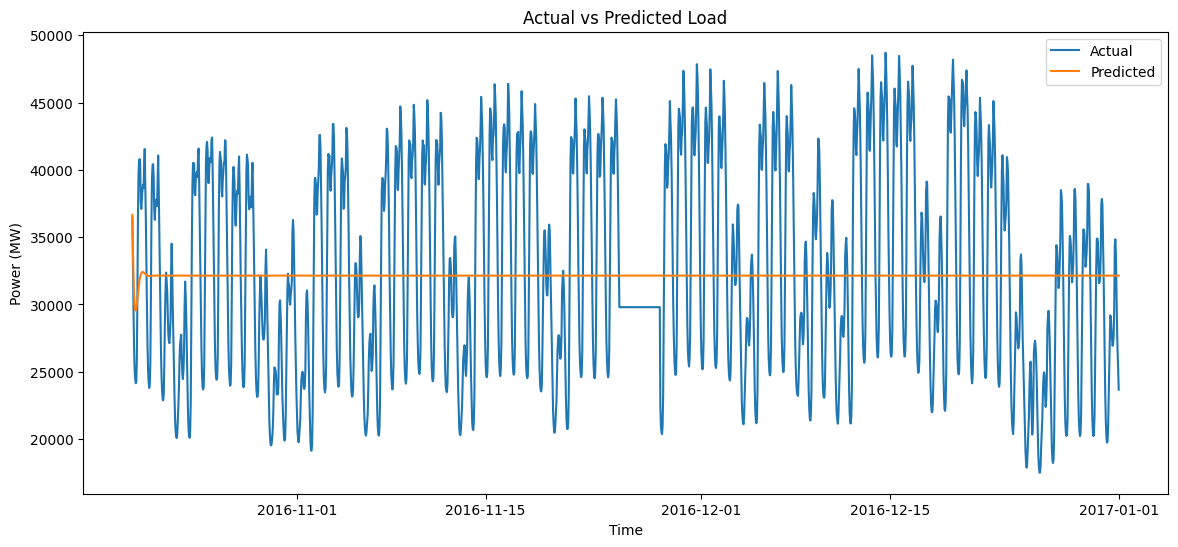

In [24]:
plt.figure(figsize=(14,6))
plt.plot(df['utc_timestamp'][train_size:],test,label='Actual')
plt.plot(df['utc_timestamp'][train_size:],predictions,label='Predicted')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Power (MW)')
plt.title('Actual vs Predicted Load')
plt.show()

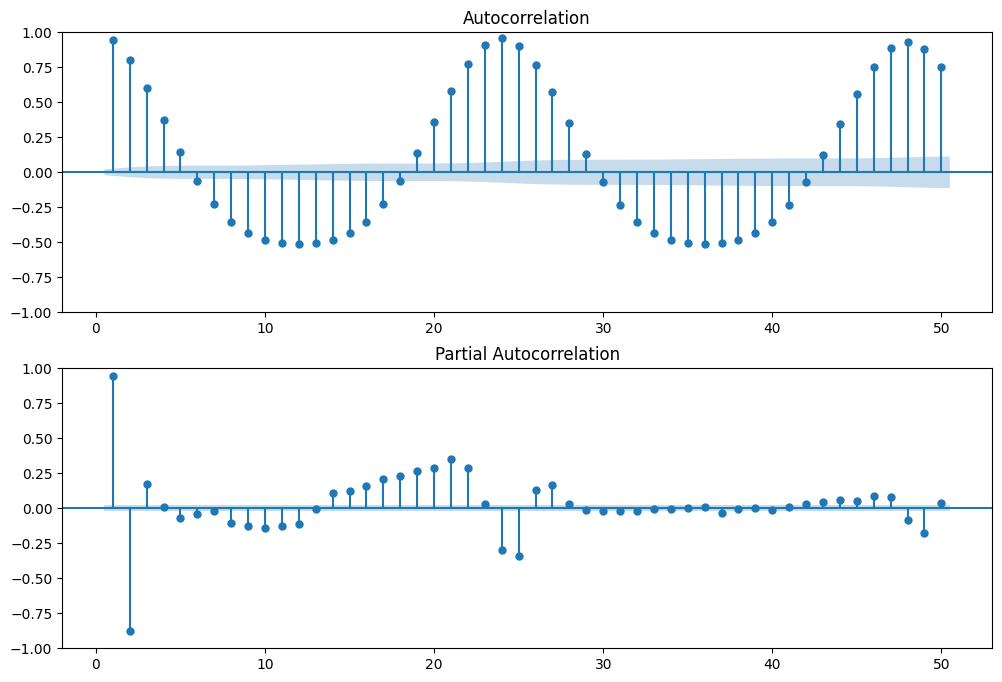

In [25]:
# plot ACF & PACF for IT_solor_generation
fig,(ax1,ax2)=plt.subplots(2,1,figsize=(12,8))
plot_acf(df['IT_solar_generation'],lags=50,zero=False,ax=ax1)
plot_pacf(df['IT_solar_generation'],lags=50,zero=False,ax=ax2)
plt.show()

In [26]:
train_size=int(len(df['IT_solar_generation'])*0.8)
train,test=df['IT_solar_generation'][:train_size],df['IT_solar_generation'][train_size:]
model=ARIMA(train,order=(2,0,2))
model_fit=model.fit()
predictions=model_fit.predict(start=len(train),end=len(train)+len(test)-1,typ='levels')

rmse=sqrt(mean_squared_error(test,predictions))
print('Test RMSE: %.3f'%rmse)


Test RMSE: 2486.151


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


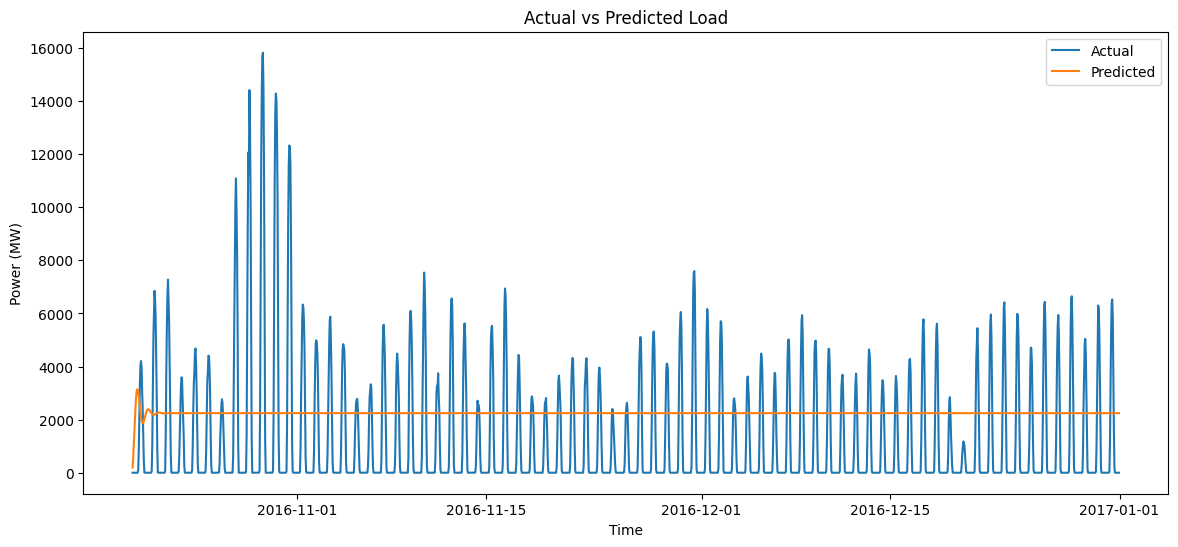

In [27]:
plt.figure(figsize=(14,6))
plt.plot(df['utc_timestamp'][train_size:],test,label='Actual')
plt.plot(df['utc_timestamp'][train_size:],predictions,label='Predicted')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Power (MW)')
plt.title('Actual vs Predicted Load')
plt.show()

As for the conclusion, the ARIMA model is not performing well on the data and it is unable to do the predictions well.